# Bayesian Linear Regression

Estimating ${\bf w}$ under a Bayesian approach

----


Suppose we are given a dataset $\mathcal{D}=\left\{({\bf x}_n, y_n)\vert {\bf x}_n \in \mathbb{R}^M, y_n\in\mathbb{R} \right\}_{n=1}^N$ that we wish to model as

$$
    y\vert {\bf x} \sim \mathcal{N}({\bf w}^T{\bf x}, \sigma^2)
$$

To get a sense of the possible values of $\bf w$, we assign $\bf w$ a *prior* distribution and we wish to compute the *posterior* distribution of ${\bf w}\vert y, {\bf x}$.

For the most simple case, we can assume that ${\bf w}\sim\mathcal{N}(\boldsymbol\mu_0, \boldsymbol\Sigma_0)$ (a conjugate prior). Hence we need to find the form of

$$
\begin{aligned}
p({\bf w}\vert \mathcal{D}) &\propto p({\bf w})p(\mathcal D\vert {\bf w})\\
&= \mathcal{N}({\bf w}\vert \boldsymbol\mu_0, \boldsymbol\Sigma_0) \mathcal{N}({\bf y} \vert {\bf X}{\bf w}, \sigma^2{\bf I})
\end{aligned}
$$

In [1]:
import sympy as sym
from sympy import init_printing
init_printing()

In [2]:
N, M = 5, 3
Phi = sym.MatrixSymbol("Phi", M, N)
t = sym.MatrixSymbol("t", N, 1)
w = sym.MatrixSymbol("w", M, 1) 

In [3]:
t.T @ Phi.T @ w

In [4]:
M, N = 3, 5
t = sym.symbols(f"t1:{N + 1}")
t = sym.Matrix(t).reshape(N, 1)

w = sym.symbols(f"w1:{M + 1}")
w = sym.Matrix(w).reshape(M, 1)

phi = sym.symbols("phi1:6(1:4)")
phi = sym.Matrix(phi).reshape(N, M)

m0 = sym.symbols(f"m1:{M + 1}")
m0 = sym.Matrix(m0).reshape(M, 1)

S0 = sym.symbols(f"s1:{M + 1}(1:{M + 1})")
S0 = sym.Matrix(S0).reshape(M, M)

In [5]:
def f(i): return (t[i] - (w.T @ phi[i, :].T)[0]) ** 2

In [6]:
f(0)

In [7]:
sum([f(i) for i in range(N)])

In [8]:
(t - phi @ w).T @ (t - phi @ w)

In [9]:
(m0.T @ S0 @ w)[0] == (m0.T @ S0 @ w).T[0]

True

## Posterior Distribution

In [12]:
# Beta is the known error term;
# Alpha is the variance (assuming an isotropic gaussian)
alpha, beta = sym.symbols("alpha beta")

S0 =  sym.Identity(3) / alpha
m0 = sym.MatrixSymbol("m", 3, 1)
phi = sym.MatrixSymbol("Phi", 5, 3)
t = sym.MatrixSymbol("t", 5, 1)

In [20]:
Sn = S0 + (phi.T @ phi).inv() / beta
mn = Sn @ (S0.inv() @ m0 + beta * phi.T @ t)

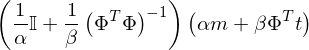

In [21]:
Sn * (S0.inv() @ m0 + beta * phi.T @ t)